# Capstone Project - The Battle of the Neighborhoods (Week 2)
## Applied Data Science Capstone by IBM/Coursera

### Table of contents
Introduction: Business Problem
Data
Methodology
Analysis
Results and Discussion
Conclusion

#### Introduction: Business Problem
This project aims to find a safe and secure location for opening commercial establishments in Vancouver. This report will target stakeholders interested in opening business places like Grocery Store in Vancouver.

The first task is choosing the safest area by analysing crime data for opening a grocery store and short listing a neighbourhood, where grocery stores are not amongst the most commom venues, and still as close as possible to the city.

We will use data science tools to analyse data, focus on the safest borough and search its neighborhoods and the 10 most common venues in each one to find the best neighborhood for a grocery store that is not one of the most common venues.

#### Data
The factors that will influence our decission are:

-finding the safest borough based on crime statistics
-finding the most common venues
-choosing the right neighbourhood within the borough

We will use the geographical coordinates of the city to plot neighbourhoods in a safe borough, cluster our neighborhoods and present the findings.

The required information will come from the following sources:

1- a data set from Kaggle with crimes in Vancouver from 2003 to 2019, consisting of the crime statistics of each neighbourhoof in Vancouver along with type of crime, recorded year, month and hour.

2- use Wikipedia to source additional information about the boroughs of Vancouver. This information will be used to map the existing data where each neighbourhood can be assigned with the right borough.

3- using OpenCage Geocoder, we will get data about the neighbourhoods, boroughs, crimes, co-ordinates, etc, to find the safest borough and explore the neighbourhood by plotting it on maps using Folium.

4- Finallu, we will create a new consolidated dataset of the neighborhoods, boroughs, most common venues with co-ordinates. We will fetch this using Four Square API, explore the venues, apply a machine learning algorithm to cluster the neighbourhoods, and plot it on maps using Folium.

#### Part 1: Kaggle data set with Crimes in Vancouver from 2003 to 2019
Vancouver Crime Report
Properties of the Crime Report

TYPE - Crime type
YEAR - Recorded year
MONTH - Recorded month
DAY - Recorded day
HOUR - Recorded hour
MINUTE - Recorded minute
HUNDRED_BLOCK - Recorded block
NEIGHBOURHOOD - Recorded neighborhood
X - GPS longtitude
Y - GPS latitude

#### Importing all the necessary Libraries

In [42]:
conda install folium -c conda-forge

Solving environment: done

## Package Plan ##

  environment location: /Users/tom/opt/anaconda3

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    conda-4.9.2                |   py38h50d1736_0         3.1 MB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/noarch::folium-0.11.0-py_0
  python_abi         conda-forge/osx-64::python_abi-3.8-1_cp38

The following packages will be SUPERSEDED by a

In [44]:
import numpy as np
import pandas as pd

#Command to install OpenCage Geocoder for fetching Lat and Lng of Neighborhood
!pip install opencage

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Importing folium to visualise Maps and plot based on Lat and Lng
import folium

#Requests to request web pages by making get requests to FourSquare REST Client
import requests

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

print('Libraries imported')

Matplotlib version:  3.3.2
Libraries imported



Requirement already satisfied: opencage in /usr/local/lib/python3.6/dist-packages (1.2)
Requirement already satisfied: six>=1.4.0 in /usr/local/lib/python3.6/dist-packages (from opencage) (1.12.0)
Requirement already satisfied: Requests>=2.2.0 in /usr/local/lib/python3.6/dist-packages (from opencage) (2.21.0)
Requirement already satisfied: urllib3<1.25,>=1.21.1 in /usr/local/lib/python3.6/dist-packages (from Requests>=2.2.0->opencage) (1.24.3)
Requirement already satisfied: idna<2.9,>=2.5 in /usr/local/lib/python3.6/dist-packages (from Requests>=2.2.0->opencage) (2.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /usr/local/lib/python3.6/dist-packages (from Requests>=2.2.0->opencage) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.6/dist-packages (from Requests>=2.2.0->opencage) (2019.9.11)
Matplotlib version:  3.1.1
Libraries imported

#### Reading from the Dataset
Due to the size of the data(~ 600,000 rows), we cannot process it all. Instead, we will consider a recent 2018 crime report.

In [2]:
vnc_crime_df = pd.read_csv('https://raw.githubusercontent.com/RamanujaSVL/Coursera_Capstone/master/vancouver_crime_records_2018.csv', index_col=None)

#Dropping X,Y which represents Lat, Lng data as Coordinates, the data seems to be corrupt
vnc_crime_df.drop(['Unnamed: 0','MINUTE', 'HUNDRED_BLOCK', 'X', 'Y'], axis = 1, inplace = True)

#vnc_crime_df.columns

vnc_crime_df.head()


,TYPE,YEAR,MONTH,DAY,HOUR,NEIGHBOURHOOD
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


#### Changing the name of columns to lowercase

In [3]:

vnc_crime_df.columns = ['Type', 'Year','Month','Day','Hour','Neighbourhood']
vnc_crime_df.head()

,Type,Year,Month,Day,Hour,Neighbourhood
0,Break and Enter Commercial,2018,3,2,6,West End
1,Break and Enter Commercial,2018,6,16,18,West End
2,Break and Enter Commercial,2018,12,12,0,West End
3,Break and Enter Commercial,2018,4,9,6,Central Business District
4,Break and Enter Commercial,2018,10,2,18,Central Business District


#### Total Crimes in different Neighborhoods

In [4]:
vnc_crime_df['Neighbourhood'].value_counts()

Central Business District    10857
West End                      3031
Mount Pleasant                2396
Strathcona                    1987
Kitsilano                     1802
Fairview                      1795
Renfrew-Collingwood           1762
Grandview-Woodland            1761
Kensington-Cedar Cottage      1391
Hastings-Sunrise              1270
Sunset                         967
Riley Park                     866
Marpole                        828
Victoria-Fraserview            600
Killarney                      565
Oakridge                       499
Dunbar-Southlands              474
Kerrisdale                     417
Shaughnessy                    414
West Point Grey                372
Arbutus Ridge                  311
South Cambie                   292
Stanley Park                   154
Musqueam                        17
Name: Neighbourhood, dtype: int64

#### Part 2: Gathering further information about the neighborhoods from Wikipedia

In [5]:
# define the dataframe columns
column_names = ['Neighbourhood', 'Borough'] 

# instantiate the dataframe
vnc_neigh_bor = pd.DataFrame(columns=column_names)

vnc_neigh_bor['Neighbourhood'] = vnc_crime_df['Neighbourhood'].unique()

neigh_bor_dict = {'Central Business District':'Central', 'West End':'Central', 'Stanley Park':'Central', 'Victoria-Fraserview':'South Vancouver',
                  'Killarney':'South Vancouver', 'Musqueam':'South Vancouver', 'Mount Pleasant':'East Side', 'Strathcona':'East Side',
                  'Renfrew-Collingwood':'East Side', 'Grandview-Woodland':'East Side', 'Kensington-Cedar Cottage':'East Side', 'Hastings-Sunrise':'East Side',
                  'Sunset':'East Side', 'Riley Park':'East Side', 'Kitsilano':'West Side', 'Fairview':'West Side',
                  'Marpole':'West Side', 'Oakridge':'West Side', 'Dunbar-Southlands':'West Side', 'Kerrisdale':'West Side',
                  'Shaughnessy':'West Side', 'West Point Grey':'West Side', 'Arbutus Ridge':'West Side', 'South Cambie':'West Side'}

for row, neigh in zip(neigh_bor_dict, vnc_neigh_bor['Neighbourhood']):
  vnc_neigh_bor.loc[vnc_neigh_bor.Neighbourhood == row, 'Borough'] = neigh_bor_dict.get(row)

vnc_neigh_bor.dropna(inplace=True)

print("Total Neighbourhood Count",len(vnc_neigh_bor['Neighbourhood']),"Borough Count",len(vnc_neigh_bor['Borough'].unique()))

vnc_neigh_bor.head()

Total Neighbourhood Count 24 Borough Count 4


,Neighbourhood,Borough
0,West End,Central
1,Central Business District,Central
2,Hastings-Sunrise,East Side
3,Grandview-Woodland,East Side
4,Mount Pleasant,East Side


#### Merging the crime data table to include the boroughs

In [6]:
vnc_boroughs_crime = pd.merge(vnc_crime_df,vnc_neigh_bor, on='Neighbourhood')

vnc_boroughs_crime.head()

,Type,Year,Month,Day,Hour,Neighbourhood,Borough
0,Break and Enter Commercial,2018,3,2,6,West End,Central
1,Break and Enter Commercial,2018,6,16,18,West End,Central
2,Break and Enter Commercial,2018,12,12,0,West End,Central
3,Break and Enter Commercial,2018,3,2,3,West End,Central
4,Break and Enter Commercial,2018,3,17,11,West End,Central


Cleaning the data by removing rows with invalid data

In [7]:
vnc_boroughs_crime.dropna(inplace=True)
vnc_boroughs_crime['Borough'].value_counts()

Central            14042
East Side          12400
West Side           7204
South Vancouver     1182
Name: Borough, dtype: int64

## Methodology
Categorized the methodologysection into two parts:

-Visualise the crime repots of different boroughs to idenity the safest borough. We will use the resulting data and find the 10 most common venues in each neighborhood.
-To help stakeholders choose the right neighborhood we will cluster similar neighborhoods using K-Means clustering, which is an unsupervised machine learning algorithm that clusters data based on a predefined cluster size. K-Means clustering will address this problem and group data based on existing venues.

#### Pivoting the table to better understand the data by crimes per borough

In [8]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

#### Merging the Pivoted Column with other columns

In [9]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total'}, inplace=True)
# To ignore bottom All in Borough
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat

,Borough,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


#### Pivoting the table to better understand the data by crimes per neighborhood

In [10]:
vnc_crime_neigh = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Neighbourhood'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_neigh

Year  \
Type                      Break and Enter Commercial   
Neighbourhood                                          
Arbutus Ridge                                     12   
Central Business District                        551   
Dunbar-Southlands                                  8   
Fairview                                         138   
Grandview-Woodland                               148   
Hastings-Sunrise                                  48   
Kensington-Cedar Cottage                          62   
Kerrisdale                                        24   
Killarney                                         34   
Kitsilano                                        106   
Marpole                                           44   
Mount Pleasant                                   205   
Musqueam                                           0   
Oakridge                                          19   
Renfrew-Collingwood                               91   
Riley Park                                        35   
Shaughnessy                                       12   
South Cambie                                      22   
Stanley Park                                       6   
Strathcona                                       160   
Sunset                                            37   
Victoria-Fraserview                               15   
West End                                         230   
West Point Grey                                   18   
All                                             2025   

                                                                      \
Type                      Break and Enter Residential/Other Mischief   
Neighbourhood                                                          
Arbutus Ridge                                            78       49   
Central Business District                               124     1812   
Dunbar-Southlands                                       106       81   
Fairview                                                 73      233   
Grandview-Woodland                                      162      304   
Hastings-Sunrise                                        117      195   
Kensington-Cedar Cottage                                145      255   
Kerrisdale                                               97       49   
Killarney                                                72       90   
Kitsilano                                               165      320   
Marpole                                                 125      134   
Mount Pleasant                                          124      353   
Musqueam                                                  4        3   
Oakridge                                                123       64   
Renfrew-Collingwood                                     156      243   
Riley Park                                              122      140   
Shaughnessy                                             120       41   
South Cambie                                             42       41   
Stanley Park                                              2        8   
Strathcona                                              124      527   
Sunset                                                   93      175   
Victoria-Fraserview                                      80       94   
West End                                                 72      460   
West Point Grey                                          71       50   
All                                                    2397     5721   

                                                                           \
Type                      Other Theft Theft from Vehicle Theft of Bicycle   
Neighbourhood                                                               
Arbutus Ridge                      18                111               12   
Central Business District        2034               5301              640   
Dunbar-Southlands                  31                199               16   


#### Merging pivoted column with other columns

In [15]:
vnc_crime_neigh.reset_index(inplace = True)
vnc_crime_neigh.columns = vnc_crime_neigh.columns.map(''.join)
vnc_crime_neigh.rename(columns={'YearAll':'Total'}, inplace=True)

vnc_crime_neigh.head()

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
2,Dunbar-Southlands,8,106,81,31,199,16,9,1,23,474
3,Fairview,138,73,233,297,692,245,55,0,62,1795
4,Grandview-Woodland,148,162,304,215,634,110,123,0,65,1761


Pandas describe() to view basic statistical details. 

In [11]:
vnc_crime_cat.describe()

,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
count,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,506.250000,599.250000,1430.25000,1236.750000,3736.500000,539.750000,286.500000,3.250000,368.500000,8707.000000
std,354.409721,488.189427,997.26572,1060.087221,2723.536977,353.955153,226.117226,3.304038,227.060198,5801.870618
min,49.000000,156.000000,187.00000,88.000000,483.000000,36.000000,71.000000,1.000000,111.000000,1182.000000
25%,314.500000,187.500000,843.25000,544.000000,2249.250000,450.000000,186.500000,1.000000,263.250000,5698.500000
50%,594.500000,599.000000,1627.00000,1185.000000,3796.000000,633.000000,235.000000,2.000000,351.500000,9802.000000
75%,786.250000,1010.750000,2214.00000,1877.750000,5283.250000,722.750000,335.000000,4.250000,456.750000,12810.500000
max,787.000000,1043.000000,2280.00000,2489.000000,6871.000000,857.000000,605.000000,8.000000,660.000000,14042.000000


### Visualising the data

#### Organising the data by crimes per neighborhood

In [16]:
vnc_crime_neigh.sort_values(['Total'], ascending = False, axis = 0, inplace = True )

crime_neigh_top5 = vnc_crime_neigh.iloc[1:6]
crime_neigh_top5

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
1,Central Business District,551,124,1812,2034,5301,640,165,0,230,10857
22,West End,230,72,460,455,1461,203,77,1,72,3031
11,Mount Pleasant,205,124,353,493,822,232,67,0,100,2396
19,Strathcona,160,124,527,81,821,108,76,2,88,1987
9,Kitsilano,106,165,320,154,755,189,51,1,61,1802


#### 5 neighborhoods with highest crime

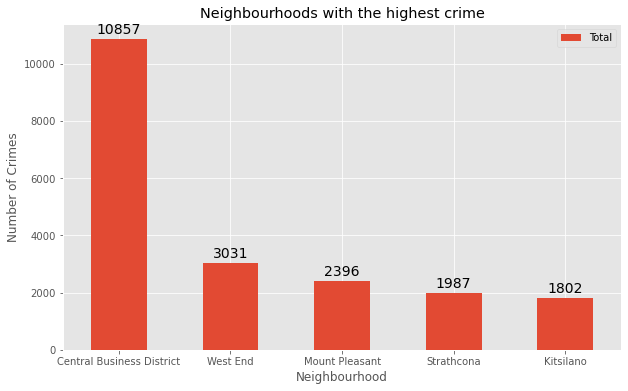

In [21]:
per_neigh = crime_neigh_top5[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods with the highest crime')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### 5 neighborhoods with lowest crime

In [18]:
crime_neigh_low = vnc_crime_neigh.tail(5)
crime_neigh_low

,Neighbourhood,YearBreak and Enter Commercial,YearBreak and Enter Residential/Other,YearMischief,YearOther Theft,YearTheft from Vehicle,YearTheft of Bicycle,YearTheft of Vehicle,YearVehicle Collision or Pedestrian Struck (with Fatality),YearVehicle Collision or Pedestrian Struck (with Injury),Total
23,West Point Grey,18,71,50,11,157,32,11,0,22,372
0,Arbutus Ridge,12,78,49,18,111,12,12,1,18,311
17,South Cambie,22,42,41,38,111,19,8,0,11,292
18,Stanley Park,6,2,8,0,109,14,3,0,12,154
12,Musqueam,0,4,3,0,4,2,2,0,2,17


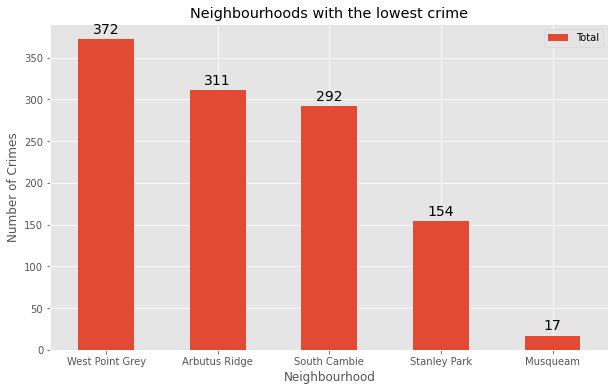

In [20]:
per_neigh = crime_neigh_low[['Neighbourhood','Total']]

per_neigh.set_index('Neighbourhood',inplace = True)

ax = per_neigh.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods with the lowest crime')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

#### Vancouver borough with the highest crime

In [22]:
vnc_crime_cat = pd.pivot_table(vnc_boroughs_crime,
                               values=['Year'],
                               index=['Borough'],
                               columns=['Type'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
vnc_crime_cat

Year                                    \
Type            Break and Enter Commercial Break and Enter Residential/Other   
Borough                                                                        
Central                                787                               198   
East Side                              786                              1043   
South Vancouver                         49                               156   
West Side                              403                              1000   
All                                   2025                              2397   

                                                                          \
Type            Mischief Other Theft Theft from Vehicle Theft of Bicycle   
Borough                                                                    
Central             2280        2489               6871              857   
East Side           2192        1674               4754              678   
South Vancouver      187          88                483               36   
West Side           1062         696               2838              588   
All                 5721        4947              14946             2159   

                                  \
Type            Theft of Vehicle   
Borough                            
Central                      245   
East Side                    605   
South Vancouver               71   
West Side                    225   
All                         1146   

                                                                        \
Type            Vehicle Collision or Pedestrian Struck (with Fatality)   
Borough                                                                  
Central                                                          1       
East Side                                                        8       
South Vancouver                                                  1       
West Side                                                        3       
All                                                             13       

                                                                             
Type            Vehicle Collision or Pedestrian Struck (with Injury)    All  
Borough                                                                      
Central                                                        314    14042  
East Side                                                      660    12400  
South Vancouver                                                111     1182  
West Side                                                      389     7204  
All                                                           1474    34828

In [23]:
vnc_crime_cat.reset_index(inplace = True)
vnc_crime_cat.columns = vnc_crime_cat.columns.map(''.join)
vnc_crime_cat.rename(columns={'YearAll':'Total',
                              'YearBreak and Enter Commercial' : 'Break and Enter Commercial',
                              'YearBreak and Enter Residential/Other' : 'Break and Enter Residential',
                              'YearMischief' : 'Mischief',
                              'YearOther Theft' : 'Other',
                              'YearTheft from Vehicle' : 'Theft from Vehicle',
                              'YearTheft of Bicycle' : 'Theft of Bicycle',
                              'YearTheft of Vehicle' : 'Theft of Vehicle',
                              'YearVehicle Collision or Pedestrian Struck (with Fatality)' : 'Vehicle Collision or Pedestrian Struck (with Fatality)',
                              'YearVehicle Collision or Pedestrian Struck (with Injury)' : 'Vehicle Collision or Pedestrian Struck (with Injury)'}, inplace=True)
# To ignore bottom All in Borough
vnc_crime_cat = vnc_crime_cat.head(4)
vnc_crime_cat

,Borough,Break and Enter Commercial,Break and Enter Residential,Mischief,Other,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Total
0,Central,787,198,2280,2489,6871,857,245,1,314,14042
1,East Side,786,1043,2192,1674,4754,678,605,8,660,12400
2,South Vancouver,49,156,187,88,483,36,71,1,111,1182
3,West Side,403,1000,1062,696,2838,588,225,3,389,7204


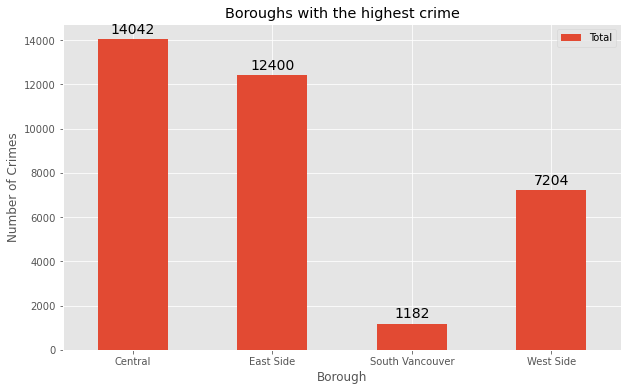

In [26]:
per_borough = vnc_crime_cat[['Borough','Total']]

per_borough.set_index('Borough',inplace = True)

ax = per_borough.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Boroughs with the highest crime')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14,
               )

plt.show()

####  Exploratory data analysis reveals that that South Vancouver has the lowest crime
Since South Vancouver has a small number of neighborhoods and opening a commercial establishment would not be viable, we will select the borough with second lowest crime: West Side.

#### Different types of crime recorded in West Side 
The crime 'Break and enter Commercial' is low compared with crime types which makes West Side a good location for a commercial establishment

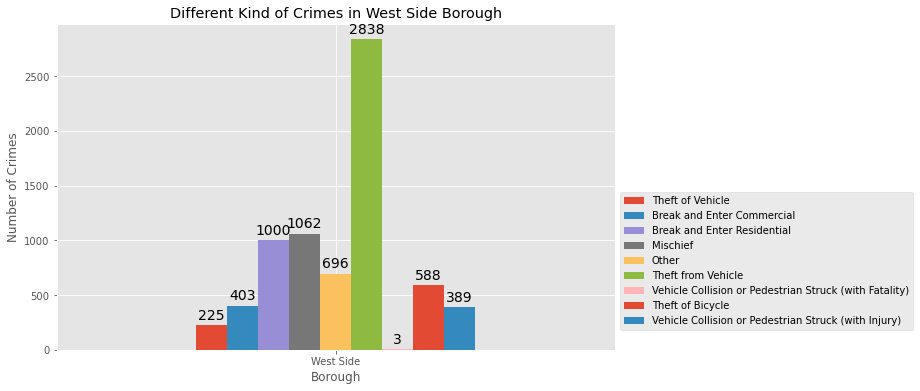

In [28]:
vnc_ws_df = vnc_crime_cat[vnc_crime_cat['Borough'] == 'West Side']

vnc_ws_df = vnc_ws_df.sort_values(['Total'], ascending = True, axis = 0)

vnc_ws = vnc_ws_df[['Borough','Theft of Vehicle', 'Break and Enter Commercial','Break and Enter Residential','Mischief','Other',
                 'Theft from Vehicle','Vehicle Collision or Pedestrian Struck (with Fatality)','Theft of Bicycle',
                 'Vehicle Collision or Pedestrian Struck (with Injury)']]


vnc_ws.set_index('Borough',inplace = True)

ax = vnc_ws.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough')
ax.set_title('Different Kind of Crimes in West Side Borough')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=3), 
                (p.get_x()+p.get_width()/3., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(5, 10), 
                textcoords='offset points',
                fontsize = 14
               )
    ax.legend(loc='upper left', bbox_to_anchor=(1.00, 0.5))

plt.show()

### Part 3: Creating a consolidated dataset of the neighborhoods,  boroughs, crime data and co-ordinates
We will get the data with OpenCage Geocoder, finding the safest borough and exploring the neighbourhood by plotting it on maps with Folium.

First, we restrict the rows of the data frame to rows with West side as a borough

In [29]:
vnc_ws_neigh = vnc_boroughs_crime

#vnc_ws_neigh.drop(['Type','Year', 'Month', 'Day', 'Hour'], axis = 1, inplace = True)
vnc_ws_neigh = vnc_ws_neigh[vnc_ws_neigh['Borough'] == 'West Side']
vnc_ws_neigh.reset_index(inplace=True, drop=True)

print('Number of Neighbourhoods in West Side Borough', len(vnc_ws_neigh['Neighbourhood'].unique()))

vnc_ws_neigh['Neighbourhood'].unique()

Number of Neighbourhoods in West Side Borough 10


array(['Shaughnessy', 'Fairview', 'Oakridge', 'Marpole', 'Kitsilano',
       'Kerrisdale', 'West Point Grey', 'Arbutus Ridge', 'South Cambie',
       'Dunbar-Southlands'], dtype=object)

We create a new data frame with Lat, Lng.

In [34]:
Latitude = []
Longitude = []
Borough = []
Neighbourhood = vnc_ws_neigh['Neighbourhood'].unique()



key = '830323b5ca694362904814ff0a11b803'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighbourhood)):
    address = '{}, Vancouver, BC, Canada'.format(Neighbourhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    Borough.append('West Side')
print(Latitude, Longitude)

#print('The geograpical coordinate of Vancouver City are {}, {}.'.format(latitude, longitude))

[49.2463051, 49.2619557, 49.2266149, 49.2092233, 49.2694099, 49.2209848, 49.2681022, 49.2463051, 49.2464639, 49.237864] [-123.1384051, -123.1304084, -123.1229433, -123.1361495, -123.155267, -123.1595484, -123.2026425, -123.159636, -123.1216027, -123.1843544]


New data frame with neighborhoods in West Side along with centroid of their co-ordinates

In [35]:
ws_neig_dict = {'Neighbourhood': Neighbourhood,'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
ws_neig_geo = pd.DataFrame(data=ws_neig_dict, columns=['Neighbourhood', 'Borough', 'Latitude', 'Longitude'], index=None)

ws_neig_geo

,Neighbourhood,Borough,Latitude,Longitude
0,Shaughnessy,West Side,49.246305,-123.138405
1,Fairview,West Side,49.261956,-123.130408
2,Oakridge,West Side,49.226615,-123.122943
3,Marpole,West Side,49.209223,-123.136150
4,Kitsilano,West Side,49.269410,-123.155267
5,Kerrisdale,West Side,49.220985,-123.159548
6,West Point Grey,West Side,49.268102,-123.202642
7,Arbutus Ridge,West Side,49.246305,-123.159636
8,South Cambie,West Side,49.246464,-123.121603
9,Dunbar-Southlands,West Side,49.237864,-123.184354


Geographical co-ordiantes of Vancouver to plot on Map

In [36]:
address = 'Vancouver, BC, Canada'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of Vancouver, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


Use Folium to plot West Side and it's neighborhoods

In [46]:
van_map = folium.Map (location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(ws_neig_geo['Latitude'], ws_neig_geo['Longitude'], ws_neig_geo['Borough'], ws_neig_geo['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(van_map)  
    
van_map

### Part 4: Creating a new  dataset of the neighborhoods, boroughs, most common venues and co-ordinates
This data will be fetched using Four Square API to explore the neighbourhood venues and to apply a machine learning algorithm to cluster the neighbourhoods and present the findings by plotting it on maps using Folium.

#### Setting Up Foursquare Credentials

In [47]:
#Four Square Credentials

CLIENT_ID = 'XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L'
CLIENT_SECRET = 'T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ'
VERSION = '20191101'
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XVY0YGK3DX5QGHMN2TGSK2EWA55P3JNPIVC5QVW5SGIGUI2L
CLIENT_SECRET:T53Z3HT4W5DVALRIPBK2DPD4NFOCISMUTMNBLNW13KEJTAIJ


#### Defining a function to fetch top 10 venues around a given neighborhood

In [48]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

#### Generating Venues

In [49]:
vnc_ws_venues = getNearbyVenues(names=ws_neig_geo['Neighbourhood'],
                                   latitudes=ws_neig_geo['Latitude'],
                                   longitudes=ws_neig_geo['Longitude']
                                  )

Shaughnessy
Fairview
Oakridge
Marpole
Kitsilano
Kerrisdale
West Point Grey
Arbutus Ridge
South Cambie
Dunbar-Southlands


#### Data frame containing venues for every neighborhood in West Side

In [50]:
print(vnc_ws_venues.shape)
vnc_ws_venues.head()

(150, 5)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Shaughnessy,49.246305,-123.138405,Devonshire Park,Park
1,Shaughnessy,49.246305,-123.138405,Bus Stop 50209 (10),Bus Stop
2,Shaughnessy,49.246305,-123.138405,Bus Stop 50206 (10),Bus Stop
3,Shaughnessy,49.246305,-123.138405,Purdys Chocolatier,Chocolate Shop
4,Fairview,49.261956,-123.130408,CRESCENT nail and spa,Nail Salon


#### Venue count per neighborhood

In [51]:
vnc_ws_venues.groupby('Neighbourhood').count().drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Category'], axis = 1)

,Venue
Neighbourhood,
Arbutus Ridge,9
Dunbar-Southlands,12
Fairview,16
Kerrisdale,4
Kitsilano,45
Marpole,29
Oakridge,8
Shaughnessy,4
South Cambie,15


In [52]:
print('There are {} uniques categories.'.format(len(vnc_ws_venues['Venue Category'].unique())))

There are 79 uniques categories.


#### Modelling


One Hot Encoding to Analyze Each Neighborhood

In [53]:
# one hot encoding
vnc_onehot = pd.get_dummies(vnc_ws_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
vnc_onehot['Neighbourhood'] = vnc_ws_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [vnc_onehot.columns[-1]] + list(vnc_onehot.columns[:-1])
vnc_onehot = vnc_onehot[fixed_columns]

vnc_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Sporting Goods Shop,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio
0,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shaughnessy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fairview,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
vnc_onehot.shape

(150, 80)

In [55]:
vnc_ws_grouped = vnc_onehot.groupby('Neighbourhood').mean().reset_index()
vnc_ws_grouped

,Neighbourhood,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Breakfast Spot,Bubble Tea Shop,...,Sporting Goods Shop,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio
0,Arbutus Ridge,0.000000,0.000000,0.0000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Dunbar-Southlands,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Fairview,0.000000,0.125000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000
3,Kerrisdale,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Kitsilano,0.044444,0.022222,0.0000,0.044444,0.000000,0.000000,0.022222,0.022222,0.000000,...,0.000000,0.044444,0.000000,0.022222,0.022222,0.044444,0.022222,0.000000,0.000000,0.022222
5,Marpole,0.000000,0.000000,0.0000,0.000000,0.034483,0.034483,0.000000,0.000000,0.034483,...,0.034483,0.103448,0.034483,0.000000,0.000000,0.034483,0.000000,0.034483,0.068966,0.000000
6,Oakridge,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,...,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000
7,Shaughnessy,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,South Cambie,0.000000,0.000000,0.0000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000
9,West Point Grey,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
vnc_ws_grouped.shape

(10, 80)

#### Top 5 common venues across neighborhoods

In [57]:
num_top_venues = 5

for hood in vnc_ws_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = vnc_ws_grouped[vnc_ws_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
            venue  freq
0  Discount Store  0.11
1    Liquor Store  0.11
2          Bakery  0.11
3    Dance Studio  0.11
4   Grocery Store  0.11


----Dunbar-Southlands----
                  venue  freq
0         Grocery Store  0.25
1          Liquor Store  0.17
2  Gym / Fitness Center  0.08
3           Coffee Shop  0.08
4             Pet Store  0.08


----Fairview----
                 venue  freq
0  Japanese Restaurant  0.12
1     Asian Restaurant  0.12
2         Camera Store  0.06
3           Nail Salon  0.06
4                 Park  0.06


----Kerrisdale----
                 venue  freq
0                 Café  0.25
1                 Pool  0.25
2          Golf Course  0.25
3                 Park  0.25
4  American Restaurant  0.00


----Kitsilano----
                 venue  freq
0  American Restaurant  0.04
1     Sushi Restaurant  0.04
2           Food Truck  0.04
3       Ice Cream Shop  0.04
4  Japanese Restaurant  0.04


----Marpole----
                   venue  

#### Create the new dataframe and display the top 10 venues for each neighborhood.

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = vnc_ws_grouped['Neighbourhood']

for ind in np.arange(vnc_ws_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(vnc_ws_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Shopping Mall,Liquor Store,Coffee Shop,Discount Store,Sandwich Place,Seafood Restaurant,Dance Studio,Bakery,Grocery Store,Gas Station
1,Dunbar-Southlands,Grocery Store,Liquor Store,Gym / Fitness Center,Pet Store,Coffee Shop,Café,Bus Stop,Japanese Restaurant,Gym,Golf Course
2,Fairview,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Korean Restaurant,Pharmacy,Park,Coffee Shop,Nail Salon,Restaurant,Salon / Barbershop
3,Kerrisdale,Golf Course,Park,Café,Pool,Yoga Studio,Fast Food Restaurant,Dim Sum Restaurant,Disc Golf,Discount Store,Dog Run
4,Kitsilano,American Restaurant,Bakery,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Food Truck,French Restaurant


#### Clustering neighbourhoods

In [60]:
# set number of clusters
kclusters = 5

vnc_grouped_clustering = vnc_ws_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vnc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 1, 0, 1, 1, 1, 2, 1, 4], dtype=int32)

In [61]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

vancouver_merged = ws_neig_geo

# merge toronto_grouped with Vancouver data to add latitude/longitude for each neighborhood
vancouver_merged = vancouver_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

vancouver_merged.head()

,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shaughnessy,West Side,49.246305,-123.138405,2,Bus Stop,Chocolate Shop,Park,Yoga Studio,Disc Golf,Discount Store,Dog Run,Falafel Restaurant,Fast Food Restaurant,Food Truck
1,Fairview,West Side,49.261956,-123.130408,1,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Korean Restaurant,Pharmacy,Park,Coffee Shop,Nail Salon,Restaurant,Salon / Barbershop
2,Oakridge,West Side,49.226615,-123.122943,1,Coffee Shop,Light Rail Station,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop,Sushi Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Gift Shop,Golf Course
3,Marpole,West Side,49.209223,-123.136150,1,Sushi Restaurant,Pizza Place,Vietnamese Restaurant,Chinese Restaurant,Bubble Tea Shop,Grocery Store,Falafel Restaurant,Japanese Restaurant,Liquor Store,Dim Sum Restaurant
4,Kitsilano,West Side,49.269410,-123.155267,1,American Restaurant,Bakery,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Food Truck,French Restaurant


In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_merged['Latitude'], vancouver_merged['Longitude'], vancouver_merged['Neighbourhood'], vancouver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Analysis
#### Examining the resulting Clusters

In [63]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 0, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,West Side,Golf Course,Park,Café,Pool,Yoga Studio,Fast Food Restaurant,Dim Sum Restaurant,Disc Golf,Discount Store,Dog Run


In [64]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 1, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,West Side,Asian Restaurant,Japanese Restaurant,Indian Restaurant,Korean Restaurant,Pharmacy,Park,Coffee Shop,Nail Salon,Restaurant,Salon / Barbershop
2,West Side,Coffee Shop,Light Rail Station,Fast Food Restaurant,Sandwich Place,Sporting Goods Shop,Sushi Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Gift Shop,Golf Course
3,West Side,Sushi Restaurant,Pizza Place,Vietnamese Restaurant,Chinese Restaurant,Bubble Tea Shop,Grocery Store,Falafel Restaurant,Japanese Restaurant,Liquor Store,Dim Sum Restaurant
4,West Side,American Restaurant,Bakery,Thai Restaurant,Japanese Restaurant,Sushi Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Food Truck,French Restaurant
8,West Side,Coffee Shop,Sushi Restaurant,Cantonese Restaurant,Malay Restaurant,Café,Bus Stop,Furniture / Home Store,Shopping Mall,Gift Shop,Bank


In [65]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 2, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,West Side,Bus Stop,Chocolate Shop,Park,Yoga Studio,Disc Golf,Discount Store,Dog Run,Falafel Restaurant,Fast Food Restaurant,Food Truck


In [66]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 3, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,West Side,Shopping Mall,Liquor Store,Coffee Shop,Discount Store,Sandwich Place,Seafood Restaurant,Dance Studio,Bakery,Grocery Store,Gas Station
9,West Side,Grocery Store,Liquor Store,Gym / Fitness Center,Pet Store,Coffee Shop,Café,Bus Stop,Japanese Restaurant,Gym,Golf Course


In [67]:
vancouver_merged.loc[vancouver_merged['Cluster Labels'] == 4, vancouver_merged.columns[[1] + list(range(5, vancouver_merged.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,West Side,Gym / Fitness Center,Dog Run,Disc Golf,Performing Arts Venue,Park,Sandwich Place,Harbor / Marina,Gym,Gas Station,Furniture / Home Store


### Results and Discussion

The aim was to help stakeholders find one of the safest borough in Vancouver that also had a good neighborhood to open a commercial establishment, in this case a grocery store. Using crime data we identified a safe borough with a decent number of neighborhoods to set up any business. After choosing the borough we chose the neighborhood where grocery shops were not in close proximity to each other. We achieved this by grouping the neighborhoods into clusters to provide the stakeholders with the relavent data about venues and safety of a given neighborhood.

### Conclusion

We explored the crime data to see the different types of crimes in the neighborhoods of Vancouver and then categorized them into different boroughs. This helped group the neighborhoods into boroughs and choose the safest borough first. Once we decided on the borough, the number of neighborhoods to take into account lowered. We then shortlisted the neighborhoods based on the common venues, to choose a neighborhood which best suits the business problem.